In [88]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, auc
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [76]:
df=pd.read_csv("german_credit.csv")
print(df.columns)
df.head()


Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [77]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [78]:
df=df.sample(n=500)
df.shape


(500, 21)

In [79]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [80]:
# Print Shape of model data
df_dummy=pd.get_dummies(df)
print(df_dummy.columns)
df_dummy.shape

Index(['default', 'duration_in_month', 'credit_amount',
       'installment_as_income_perc', 'present_res_since', 'age',
       'credits_this_bank', 'people_under_maintenance',
       'account_check_status_0 <= ... < 200 DM', 'account_check_status_< 0 DM',
       'account_check_status_>= 200 DM / salary assignments for at least 1 year',
       'account_check_status_no checking account',
       'credit_history_all credits at this bank paid back duly',
       'credit_history_critical account/ other credits existing (not at this bank)',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back duly till now',
       'credit_history_no credits taken/ all credits paid back duly',
       'purpose_(vacation - does not exist?)', 'purpose_business',
       'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/television',
       'purpose_repairs',

(500, 62)

##### Check for highly correlated variables but don't required any treatment for this use case

In [81]:
df_dummy.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.192864,0.164024,0.037359,-0.010793,-0.132270,-0.065876,-0.048007,0.153217,0.252723,...,-0.136906,0.128948,0.055498,-0.030995,-0.011459,-0.006247,0.019564,-0.019564,-0.058636,0.058636
duration_in_month,0.192864,1.000000,0.585511,0.101657,0.045295,-0.086465,-0.029819,-0.042445,0.112658,-0.006480,...,-0.064216,-0.058763,0.168483,0.068350,-0.005092,-0.226480,-0.225902,0.225902,-0.141499,0.141499
credit_amount,0.164024,0.585511,1.000000,-0.270145,0.049669,0.001682,0.015616,0.017136,0.124275,-0.044060,...,-0.082000,-0.062414,0.366717,-0.128462,0.007134,-0.164464,-0.317247,0.317247,-0.018817,0.018817
installment_as_income_perc,0.037359,0.101657,-0.270145,1.000000,0.041582,0.051002,0.025975,-0.120191,-0.064761,0.032158,...,0.023423,-0.033813,0.042220,0.066328,-0.111040,-0.075377,-0.033874,0.033874,-0.150165,0.150165
present_res_since,-0.010793,0.045295,0.049669,0.041582,1.000000,0.247507,0.039338,0.008553,-0.064869,0.113496,...,-0.307256,0.160430,-0.026717,0.013205,0.009953,0.003430,-0.085586,0.085586,-0.030032,0.030032
age,-0.132270,-0.086465,0.001682,0.051002,0.247507,1.000000,0.144122,0.119471,-0.123499,0.010506,...,0.030513,-0.209062,0.118573,-0.137362,0.096681,0.027565,-0.087065,0.087065,0.039703,-0.039703
credits_this_bank,-0.065876,-0.029819,0.015616,0.025975,0.039338,0.144122,1.000000,0.139885,-0.097815,-0.006685,...,0.060151,-0.073977,-0.041204,-0.003497,0.052233,0.020413,-0.030386,0.030386,0.041150,-0.041150
people_under_maintenance,-0.048007,-0.042445,0.017136,-0.120191,0.008553,0.119471,0.139885,1.000000,-0.075037,0.031247,...,0.007450,-0.070957,-0.008646,-0.087715,0.017109,0.107185,0.031341,-0.031341,0.108286,-0.108286
account_check_status_0 <= ... < 200 DM,0.153217,0.112658,0.124275,-0.064761,-0.064869,-0.123499,-0.097815,-0.075037,1.000000,-0.371565,...,-0.053009,0.028726,0.068518,-0.058726,0.058305,-0.009952,0.041394,-0.041394,-0.090349,0.090349
account_check_status_< 0 DM,0.252723,-0.006480,-0.044060,0.032158,0.113496,0.010506,-0.006685,0.031247,-0.371565,1.000000,...,-0.090312,0.106831,-0.020749,0.024712,0.003659,-0.013303,0.036372,-0.036372,0.093940,-0.093940


### Drop the original variables which are converted to dummy

In [82]:
df.drop(['account_check_status','credit_history','purpose','savings','present_emp_since',
         'personal_status_sex','other_debtors','property','other_installment_plans','housing',
         'job','telephone','foreign_worker'],axis=1,inplace=True)

df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 202 to 657
Data columns (total 8 columns):
default                       500 non-null int64
duration_in_month             500 non-null int64
credit_amount                 500 non-null int64
installment_as_income_perc    500 non-null int64
present_res_since             500 non-null int64
age                           500 non-null int64
credits_this_bank             500 non-null int64
people_under_maintenance      500 non-null int64
dtypes: int64(8)
memory usage: 35.2 KB


### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [83]:
X=df.drop('default',axis=1)
y=df[['default']]
df.default.value_counts()


0    346
1    154
Name: default, dtype: int64

In [84]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test =model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [92]:
Rf_model = RandomForestClassifier(n_estimators=500,criterion='entropy',random_state=9999,n_jobs=2)
Rf_model.fit(X_train,y_train)
y_predict = Rf_model.predict(X_test)
model_score = Rf_model.score(X_test, y_test)
model_score

0.6533333333333333

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [95]:
model_score = Rf_model.score(X_test, y_test)
print(model_score)
metrics.confusion_matrix(y_test, y_predict)

0.6533333333333333


array([[88, 15],
       [37, 10]], dtype=int64)

### Q6 Show the list of the features importance( 1 Marks)

In [96]:
Rf_model.feature_importances_

array([0.19864273, 0.3136305 , 0.07800877, 0.07846271, 0.25492283,
       0.05377708, 0.02255538])

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [98]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [99]:
# Use below values
num_folds = 10
seed = 77

In [100]:
#Validate the Random Forest model build above using k fold

In [102]:
kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(Rf_model, X, y, cv=kfold)


In [0]:
#Calculate Mean score

In [104]:
results.mean()*100

67.80000000000001

In [0]:
# Calculate score standard deviation using std()

In [105]:
results.std()*100

5.895761189193472

# Q8 Print the confusion matrix( 1 Marks)

In [110]:

metrics.confusion_matrix(y_test, y_predict) 

array([[88, 15],
       [37, 10]], dtype=int64)

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [111]:
metrics.recall_score(y_test,y_predict)

0.2127659574468085

In [112]:
metrics.precision_score(y_test,y_predict)

0.4

# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [114]:
#Hint: Use roc_curve
from sklearn.metrics import roc_curve, auc
y_predictProb = Rf_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[::,1])

In [115]:
roc_auc = auc(fpr, tpr)
roc_auc

0.5899607519107622

In [117]:
thresholds

array([1.796, 0.796, 0.792, 0.752, 0.662, 0.646, 0.636, 0.634, 0.63 ,
       0.598, 0.562, 0.548, 0.52 , 0.49 , 0.486, 0.482, 0.472, 0.466,
       0.458, 0.452, 0.446, 0.442, 0.426, 0.41 , 0.406, 0.396, 0.38 ,
       0.37 , 0.364, 0.36 , 0.352, 0.344, 0.338, 0.332, 0.328, 0.322,
       0.312, 0.308, 0.28 , 0.27 , 0.266, 0.26 , 0.258, 0.246, 0.244,
       0.232, 0.228, 0.22 , 0.218, 0.216, 0.214, 0.206, 0.202, 0.198,
       0.196, 0.192, 0.184, 0.182, 0.172, 0.164, 0.158, 0.156, 0.128,
       0.124, 0.12 , 0.118, 0.104, 0.1  , 0.098, 0.096, 0.094, 0.084,
       0.08 , 0.048, 0.046, 0.044, 0.034, 0.022])

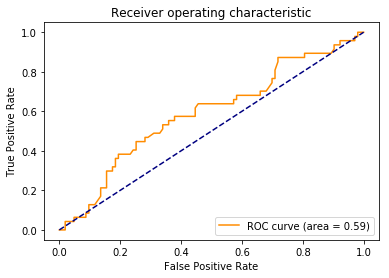

In [116]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [118]:
roc_auc = auc(fpr, tpr)
roc_auc

0.5899607519107622

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
